### Predicting plant growth

In [1]:
#import system
import os
import sys
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#import libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [4]:
#import datasets
plant_data = pd.read_csv('plant_growth_data.csv')

#inspect dataset
plant_data.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [5]:
#check shape of data
plant_data.shape

(193, 7)

In [6]:
#check data 
plant_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [7]:
#check data distribution
plant_data.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


In [8]:
#check frequences in categorical data
plant_data['Water_Frequency'].value_counts()

Water_Frequency
daily        74
bi-weekly    60
weekly       59
Name: count, dtype: int64

In [9]:
#check frequences in categorical data
plant_data['Fertilizer_Type'].value_counts()

Fertilizer_Type
none        74
chemical    65
organic     54
Name: count, dtype: int64

In [10]:
#check frequences in categorical data
plant_data['Soil_Type'].value_counts()

Soil_Type
clay     67
sandy    64
loam     62
Name: count, dtype: int64

In [11]:
#check frequences in categorical data
plant_data['Growth_Milestone'].value_counts()

Growth_Milestone
0    97
1    96
Name: count, dtype: int64

In [12]:
#check for missing data
plant_data .isnull().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

We dont have any missing data

### Exploratory Data Analysis

In [13]:
numerical_vars = ['Sunlight_Hours', 'Temperature', 'Humidity']

categorical_vars = ['Soil_Type', 'Fertilizer_Type', 'Water_Frequency', 'Growth_Milestone']

In [14]:
#dataframe
plant_growth = plant_data[numerical_vars + categorical_vars]
plant_growth.shape

(193, 7)

In [15]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 5]})

# Define your parameters
params = {
    'figure.figsize': (8, 5),  # Set the figure size (width, height)
    'font.size': 12,            # Set the font size
    'axes.labelsize': 12,       # Set the label size
    'axes.titlesize': 12,       # Set the title size
    'axes.titleweight': 'bold',  # Set the title font weight
    'axes.titlepad': 20,           # Set the distance between the title and the plot
    'xtick.labelsize': 12,      # Set the x-axis tick label size
    'ytick.labelsize': 12,      # Set the y-axis tick label size
    'xtick.direction': 'inout',  #set xtick direction
    'legend.fontsize': 12,      # set legend font size
    'legend.title_fontsize': 12     # Set the legend title font size
  
    }

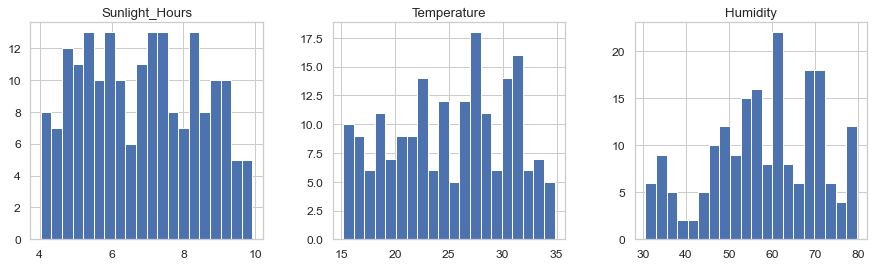

In [16]:
#check distribution of continous variables
plant_growth[numerical_vars].hist(bins=20, figsize=(15, 4), layout=(1, 3));

The numerical variabless in our dataset do not show any signs of normality or skewness

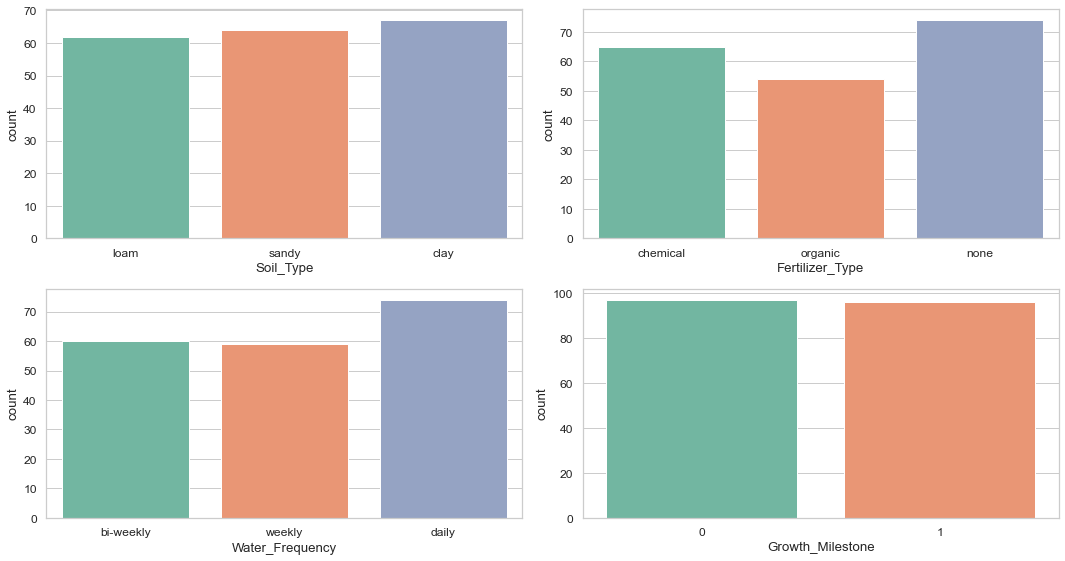

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

palette = sns.color_palette("Set2")
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.countplot(x=var, data=plant_growth, ax=subplot, palette=palette);
    
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show();

#### Explore relationships between Growth_Milestone and other variables

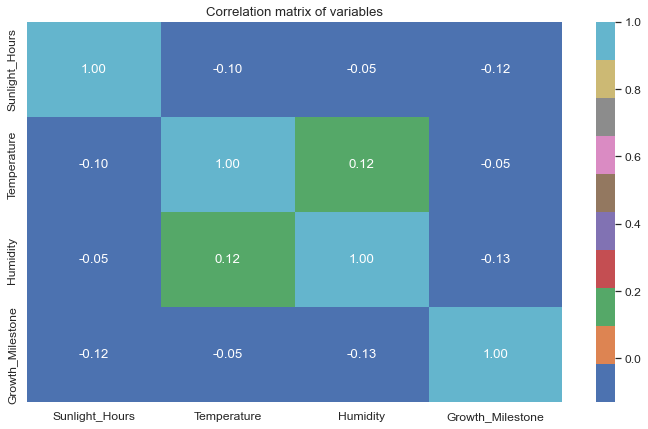

In [18]:
#Selection of numeric columns from the dataset
num_cols = list(plant_growth.select_dtypes(include='number'))
fig = plt.figure(figsize=(12,7))

#Correlation Heatmap
sns.heatmap(data=plant_growth[num_cols].corr(), 
            annot=True, fmt='.2f', cmap=sns.color_palette(as_cmap=True))
plt.title('Correlation matrix of variables')
plt.show();

No variables show any correlation

<Axes: xlabel='Fertilizer_Type', ylabel='count'>

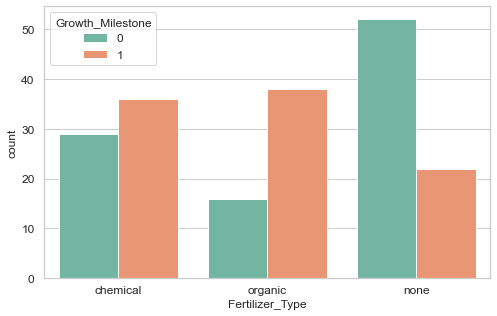

In [19]:
# Apply plot parameters
plt.rcParams.update(params)
sns.countplot(x = 'Fertilizer_Type', hue='Growth_Milestone', data = plant_growth, palette = "Set2")
# Show the plot

It looks like fertiliser type has some influence on growth. No fertiliser results in less growth.

<Axes: xlabel='Water_Frequency', ylabel='count'>

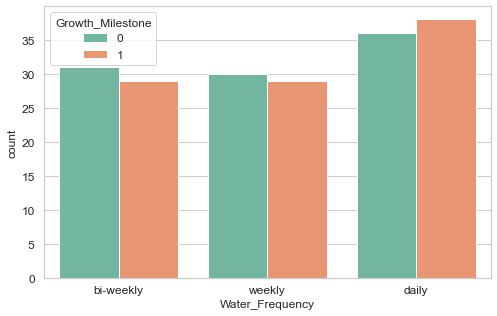

In [20]:
# Apply plot parameters
plt.rcParams.update(params)
sns.countplot(x = 'Water_Frequency', hue='Growth_Milestone', data = plant_growth, palette = "Set2")
# Show the plot

It seems water frequency doesn't influence growth that much

<Axes: xlabel='Soil_Type', ylabel='count'>

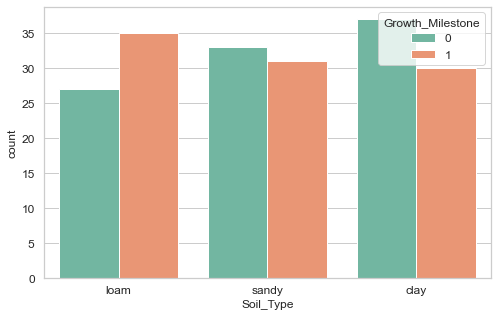

In [21]:
# Apply plot parameters
plt.rcParams.update(params)
sns.countplot(x = 'Soil_Type', hue='Growth_Milestone', data = plant_growth, palette = "Set2")
# Show the plot

Loam seems to be a good soil for plant growth

### Feature Engineering

In [22]:
#create new dataframe
model_data = plant_growth.copy()

X = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1].values

In [23]:
print(y)

[0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1
 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0]


In [24]:
print(X)

     Sunlight_Hours  Temperature   Humidity Soil_Type Fertilizer_Type  \
0          5.192294    31.719602  61.591861      loam        chemical   
1          4.033133    28.919484  52.422276     sandy         organic   
2          8.892769    23.179059  44.660539      loam            none   
3          8.241144    18.465886  46.433227      loam            none   
4          8.374043    18.128741  63.625923     sandy         organic   
..              ...          ...        ...       ...             ...   
188        5.652000    28.000000  70.200000     sandy            none   
189        7.528000    30.500000  60.100000      clay        chemical   
190        4.934000    24.500000  61.700000      loam            none   
191        8.273000    27.900000  69.500000     sandy         organic   
192        6.732000    21.700000  56.900000      clay            none   

    Water_Frequency  
0         bi-weekly  
1            weekly  
2         bi-weekly  
3         bi-weekly  
4         bi-

In [25]:
model_data.columns.to_list()

['Sunlight_Hours',
 'Temperature',
 'Humidity',
 'Soil_Type',
 'Fertilizer_Type',
 'Water_Frequency',
 'Growth_Milestone']

In [26]:
X = pd.get_dummies(X, columns=['Soil_Type', 'Fertilizer_Type', 'Water_Frequency'])

### Decision Tree Classifier 


In [27]:
#import module
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)


# initialise the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=8)

# Fit the classifier on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=8)

In [28]:
# Predict on the test data
y_pred = clf.predict(X_test)

In [29]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5517241379310345


In [30]:
#check accuracy
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#run classification report
print(classification_report(y_test,y_pred))

Accuracy: 0.5517241379310345
              precision    recall  f1-score   support

           0       0.62      0.55      0.58        33
           1       0.48      0.56      0.52        25

    accuracy                           0.55        58
   macro avg       0.55      0.55      0.55        58
weighted avg       0.56      0.55      0.55        58



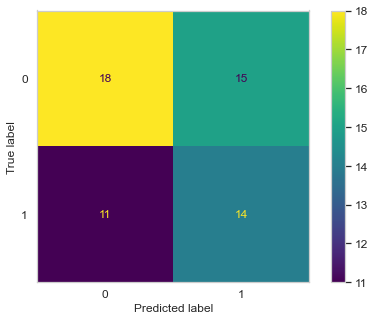

In [31]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix = cm).plot()
plt.grid(False);

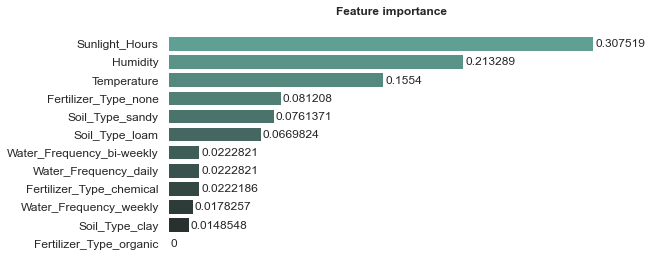

In [32]:
# Feature names and importance in DataFrame
feature_df = pd.DataFrame({'features': clf.feature_names_in_, 'importance': clf.feature_importances_ })
# Sorting data from highest to lowest
df_sorted = feature_df.sort_values(by='importance', ascending=False)

# Barplot of the result without borders and axis lines
plt.figure(figsize=(8, 4))
g = sns.barplot(data=df_sorted, x='importance', y ='features', palette="dark:#5A9_r");
sns.despine(bottom = True, left = True);
g.set_title('Feature importance');
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
plt.savefig("clf_variable_importance.png", format="png", bbox_inches="tight", facecolor='w')
for value in g.containers:
    g.bar_label(value, padding=2)
plt.show();

- Sunlight hours looks likes the most important variable influencing plant growth, followed by humidity

- Our classifier accuracy is about 60%. 

- Our sample size is quite small which may affect our model

- Lets try a different model and see if we can improve our accuracy.


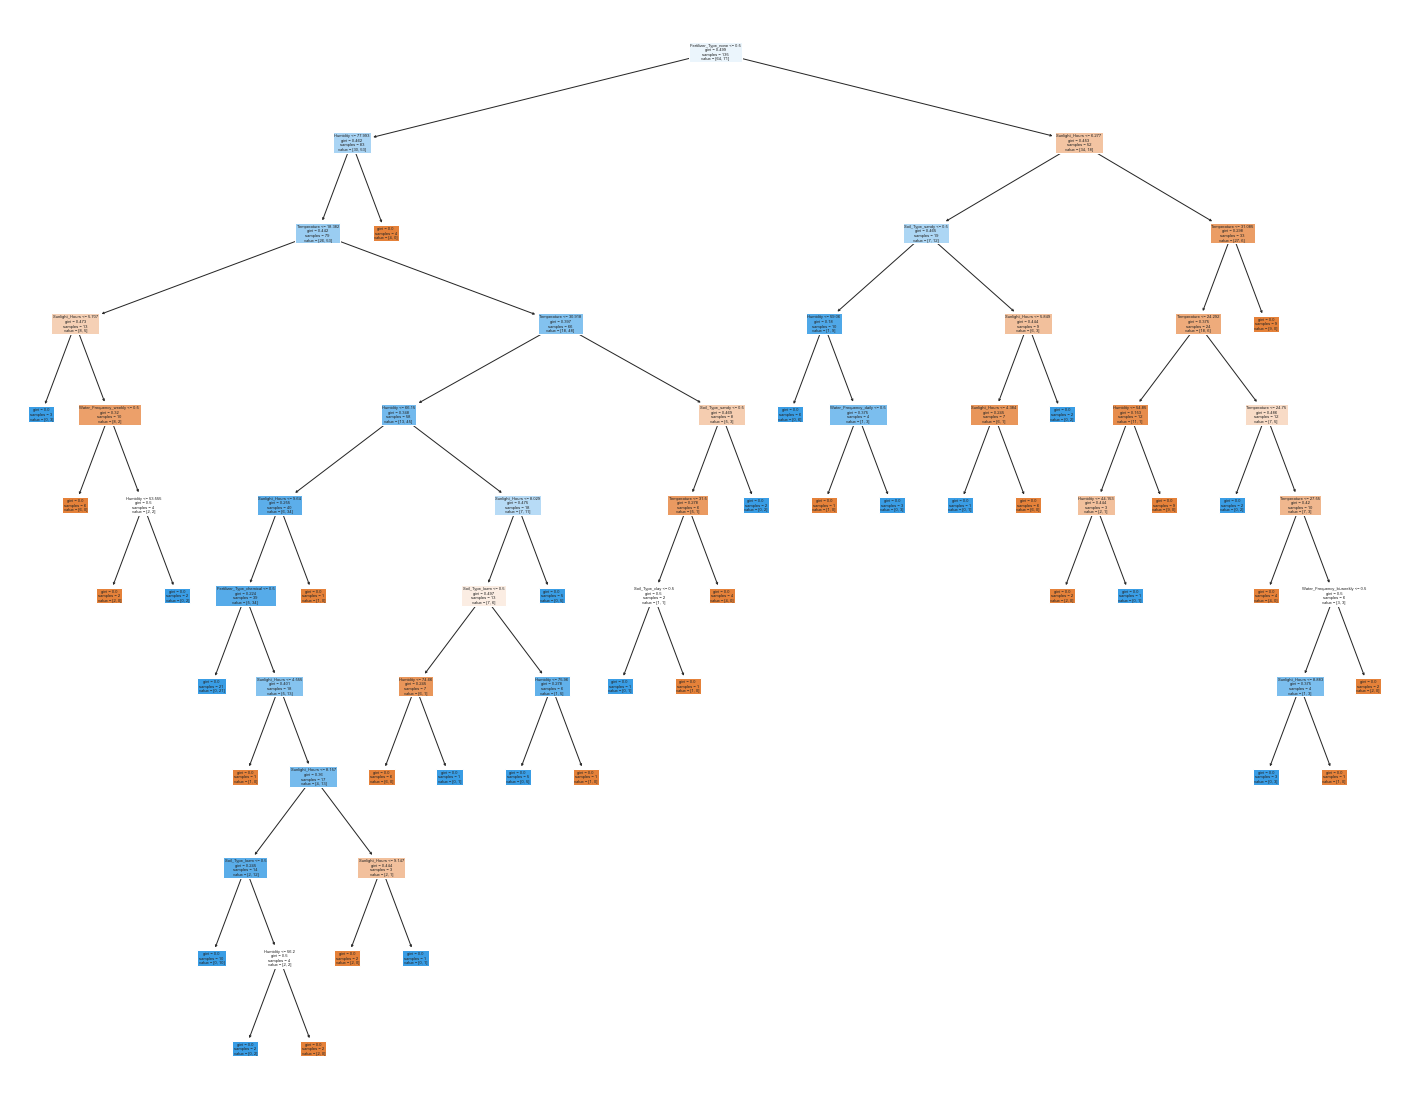

In [33]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
dec_tree = tree.plot_tree(clf,
                   feature_names=X.columns,
                   filled=True)

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ["gini", "entropy"]
}

# Instantiate the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt_classifier, 
                           param_grid=param_grid, 
                           cv=4, n_jobs=-1, verbose=1, scoring="accuracy")

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Display the best model and its hyperparameters
print("Best Decision Tree Model:", best_model)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

Best Decision Tree Model: DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)


In [36]:
# initialise the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, random_state=8)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=8)

In [37]:
# Predict on the test data
y_pred = clf.predict(X_test)

#evaluate model

#check accuracy
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#run classification report
print(classification_report(y_test,y_pred))

Accuracy: 0.5862068965517241
              precision    recall  f1-score   support

           0       0.65      0.61      0.62        33
           1       0.52      0.56      0.54        25

    accuracy                           0.59        58
   macro avg       0.58      0.58      0.58        58
weighted avg       0.59      0.59      0.59        58



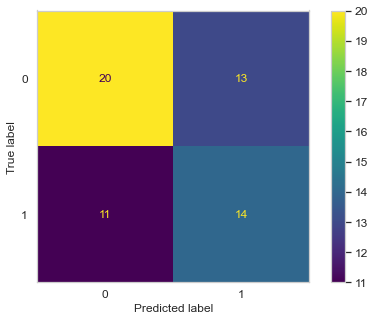

In [39]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix = cm).plot()
plt.grid(False);

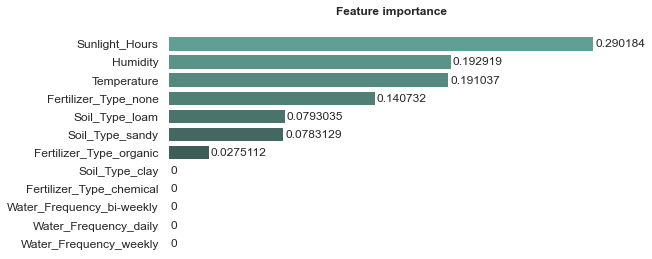

In [40]:
# Feature names and importance in DataFrame
feature_df = pd.DataFrame({'features': clf.feature_names_in_, 'importance': clf.feature_importances_ })
# Sorting data from highest to lowest
df_sorted = feature_df.sort_values(by='importance', ascending=False)

# Barplot of the result without borders and axis lines
plt.figure(figsize=(8, 4))
g = sns.barplot(data=df_sorted, x='importance', y ='features', palette="dark:#5A9_r");
sns.despine(bottom = True, left = True);
g.set_title('Feature importance');
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
plt.savefig("clf_variable_importance.png", format="png", bbox_inches="tight", facecolor='w')
for value in g.containers:
    g.bar_label(value, padding=2)
plt.show();

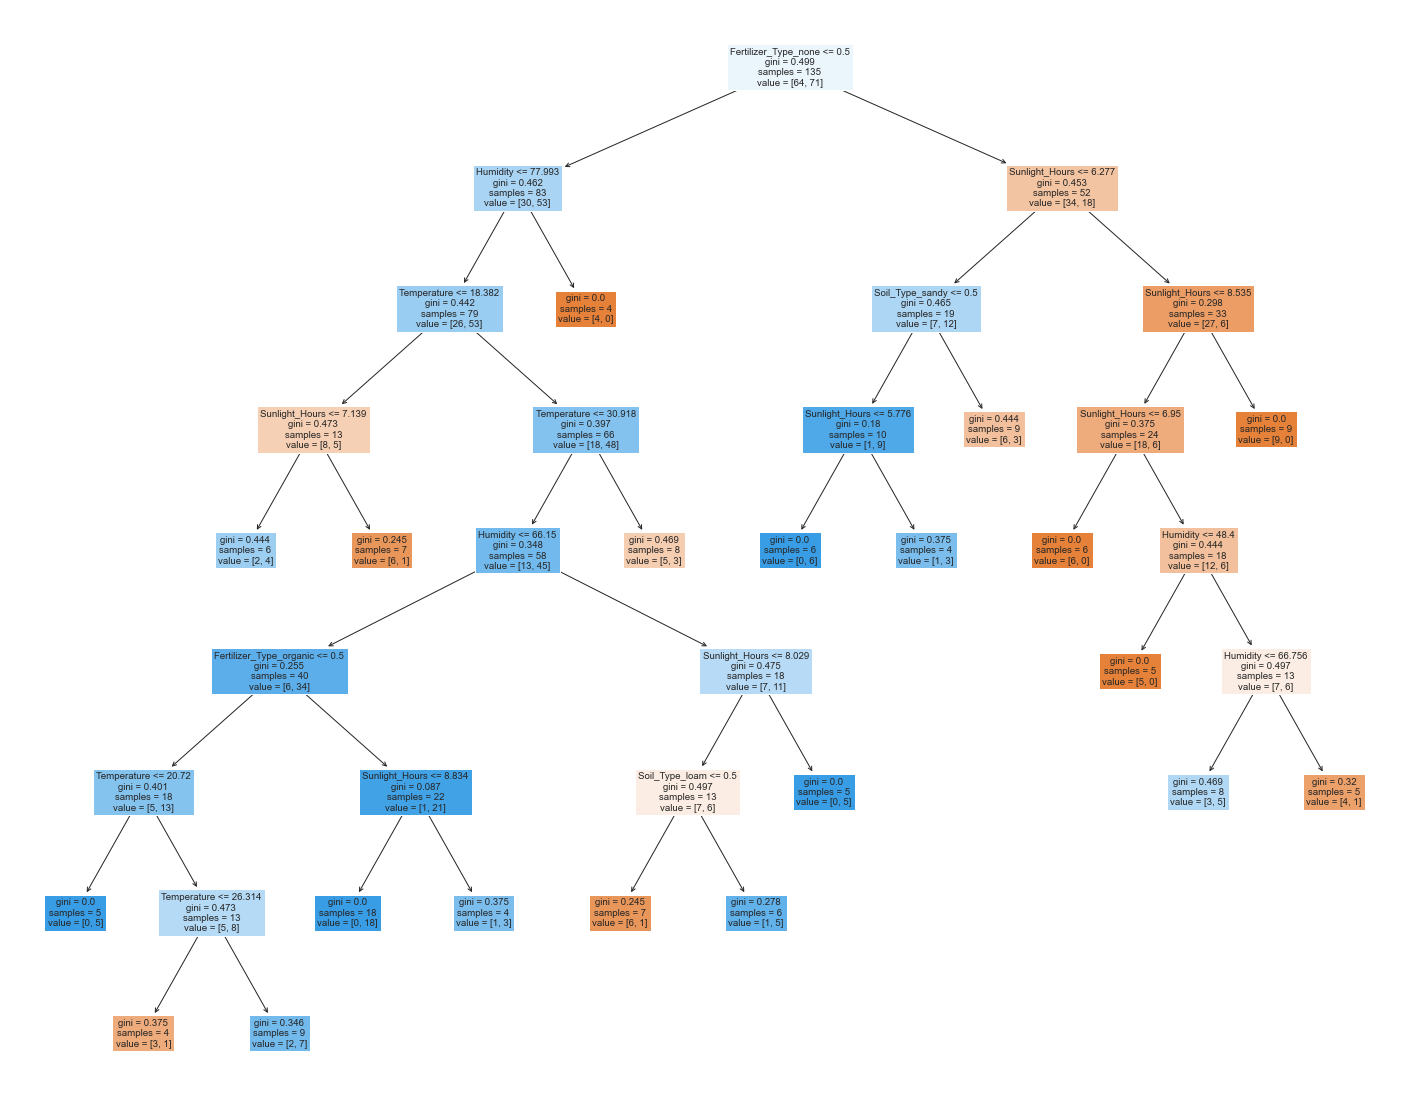

In [41]:
fig = plt.figure(figsize=(25,20))
dec_tree = tree.plot_tree(clf,
                   feature_names=X.columns,
                   filled=True)

There is a slight improvement in accuracy. We will try a different model and see if the accuracy improves. 
- we have also controlled the depth of the tree to avoid over fitting. 
- Due to the small sample size, we will try KNN. 

### K Nearest Neighbours


In [42]:
#create datasets
model_data = plant_growth.copy()

X = model_data.iloc[:, :-1].values
y = model_data.iloc[:, -1].values


In [43]:
X

array([[5.192294089205035, 31.71960241024412, 61.59186060848997, 'loam',
        'chemical', 'bi-weekly'],
       [4.033132702741614, 28.91948412187396, 52.42227609891599, 'sandy',
        'organic', 'weekly'],
       [8.892768570729004, 23.1790588882854, 44.66053858490323, 'loam',
        'none', 'bi-weekly'],
       ...,
       [4.934, 24.5, 61.7, 'loam', 'none', 'bi-weekly'],
       [8.273, 27.9, 69.5, 'sandy', 'organic', 'daily'],
       [6.732, 21.7, 56.9, 'clay', 'none', 'weekly']], dtype=object)

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encorder', OneHotEncoder(), [3, 4, 5])], remainder='passthrough')

X =np.array( ct.fit_transform(X))
print(X)

[[0.0 1.0 0.0 ... 5.192294089205035 31.71960241024412 61.59186060848997]
 [0.0 0.0 1.0 ... 4.033132702741614 28.91948412187396 52.42227609891599]
 [0.0 1.0 0.0 ... 8.892768570729004 23.1790588882854 44.66053858490323]
 ...
 [0.0 1.0 0.0 ... 4.934 24.5 61.7]
 [0.0 0.0 1.0 ... 8.273 27.9 69.5]
 [1.0 0.0 0.0 ... 6.732 21.7 56.9]]


In [45]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [46]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, -3:] = sc.fit_transform(X_train[:, -3:])
X_test[:, -3:] = sc.transform(X_test[:, -3:])

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
from sklearn.metrics import accuracy_score
y_pred = knc.predict(X_test)
#accuracy score
accuracy_score(y_test, y_pred)

0.5689655172413793

In [49]:
#run classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.45      0.55        33
           1       0.50      0.72      0.59        25

    accuracy                           0.57        58
   macro avg       0.59      0.59      0.57        58
weighted avg       0.60      0.57      0.56        58



In [50]:
#hyperparameter tuning 
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=22)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=24)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=26)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=28)

KNeighborsClassifier(n_neighbors=29)

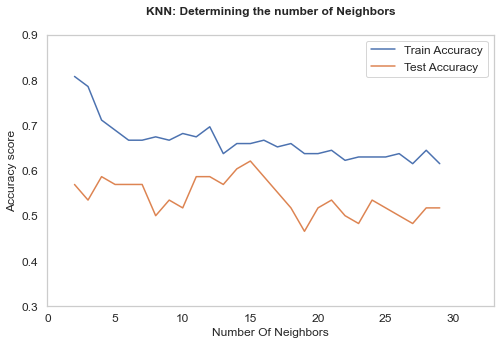

In [55]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy score")
plt.title("KNN: Determining the number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.30, 0.90)
plt.grid()
plt.show();


In [52]:
for key, value in test_score.items():
    if value==max(test_score.values()):
        print(key)

15


The best accuracy score is for 15 neighbours 

In [53]:
knn=KNeighborsClassifier(n_neighbors=15, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)


KNeighborsClassifier(n_neighbors=15)

In [54]:
accuracy_score(y_test, y_pred)

0.6206896551724138

In the end KNN wins with an accuracy of 62% as compared to DTC with an accuracy of 58%. The small sample size has an effect on the training of the model. We definitely need more data points to increasy the accuracy of the model and try other models that require a larger sample size. In general it was a fun exercise to train these models. 